In [1]:
####### importing libraries required for data wrangling.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###### importing comcast dataset - csv file.

comcast = pd.read_csv('comcast_telecom_complaints_data.csv', parse_dates=['Date_month_year'], index_col = 'Date_month_year')

In [3]:
comcast.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,242732,Speed and Service,18-04-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
comcast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-04-22 to 2015-06-24
Data columns (total 10 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


In [5]:
import datetime as dt

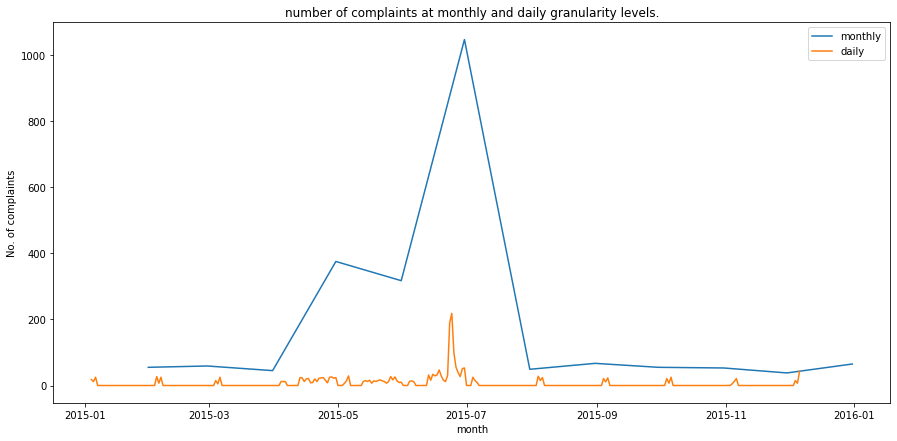

In [42]:
####### plotting number of complaints at monthly and daily granularity level.

month_vs_complaint = comcast['Customer Complaint'].resample('M').count()
date_vs_complaint = comcast['Customer Complaint'].resample('D').count()
plt.figure(figsize=(15,7))
plt.plot(month_vs_complaint, label = 'monthly')
plt.plot(date_vs_complaint, label = 'daily')
plt.title('number of complaints at monthly and daily granularity levels.')
plt.ylabel('No. of complaints')
plt.xlabel('month')
plt.legend()

In [7]:
complaint = comcast['Customer Complaint'].tolist()


In [8]:
######## importing nltk libraries to preprocess the text document.

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [9]:
stop = set(stopwords.words('English'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [10]:
def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [11]:
doc_clean = [clean(doc).split() for doc in complaint]


In [12]:
####### importing gensim to create LDA model.

import gensim
from gensim import corpora

In [13]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [14]:
lda = gensim.models.ldamodel.LdaModel
ldamodel = lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)

In [15]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(1, '0.107*"internet" + 0.102*"speed" + 0.057*"comcast"'), (3, '0.147*"service" + 0.141*"comcast" + 0.087*"internet"'), (2, '0.038*"pricing" + 0.033*"contract" + 0.033*"internet"')]


In [16]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.202*"comcast" + 0.063*"complaint" + 0.044*"service" + 0.022*"billing" + 0.015*"price" + 0.014*"paying" + 0.014*"pay" + 0.013*"refund" + 0.013*"monopoly" + 0.011*"2"')

(1, '0.107*"internet" + 0.102*"speed" + 0.057*"comcast" + 0.042*"bill" + 0.039*"service" + 0.033*"slow" + 0.020*"false" + 0.018*"day" + 0.017*"problem" + 0.012*"switch"')

(2, '0.038*"pricing" + 0.033*"contract" + 0.033*"internet" + 0.027*"connection" + 0.026*"fee" + 0.023*"comcastxfinity" + 0.022*"price" + 0.015*"back" + 0.015*"year" + 0.014*"bill"')

(3, '0.147*"service" + 0.141*"comcast" + 0.087*"internet" + 0.041*"issue" + 0.029*"customer" + 0.029*"billing" + 0.016*"poor" + 0.014*"throttling" + 0.011*"without" + 0.010*"xfinity"')

(4, '0.145*"comcast" + 0.097*"data" + 0.078*"cap" + 0.060*"billing" + 0.039*"charge" + 0.032*"internet" + 0.032*"practice" + 0.021*"cable" + 0.020*"unfair" + 0.018*"usage"')



In [17]:
word_dict = {}
for i in range(5):
    words = ldamodel.show_topic(i, topn = 20)
    word_dict["Topic # " + "{}".format(i)] = [i[0] for i in words]


In [18]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4
0,comcast,internet,pricing,service,comcast
1,complaint,speed,contract,comcast,data
2,service,comcast,internet,internet,cap
3,billing,bill,connection,issue,billing
4,price,service,fee,customer,charge
5,paying,slow,comcastxfinity,billing,internet
6,pay,false,price,poor,practice
7,refund,day,back,throttling,cable
8,monopoly,problem,year,without,unfair
9,2,switch,bill,xfinity,usage


In [19]:
####### importing pyLDAvis library to visualize the topic modeling.

import pyLDAvis.gensim

In [41]:
Lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=True)
pyLDAvis.display(Lda_display)

C:\Users\sudha\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [21]:
status = []
for i in range(len(comcast['Status'])):
    if comcast['Status'][i] in ['Open','Pending']:
        status.append('Open')
    elif comcast['Status'][i] in ['Closed','Solved']:
        status.append('Closed')
    else:
        status.append('Other')

In [22]:
comcast['Categorized_Status'] = status

In [23]:
comcast.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Categorized_Status
Date_month_year,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2015-04-18,242732,Speed and Service,18-04-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


In [24]:
comcast.loc[comcast['State'] == 'District of Columbia','State'] = 'District Of Columbia'

In [25]:
total_complaint = comcast['Categorized_Status'].groupby(by = comcast['State']).count()

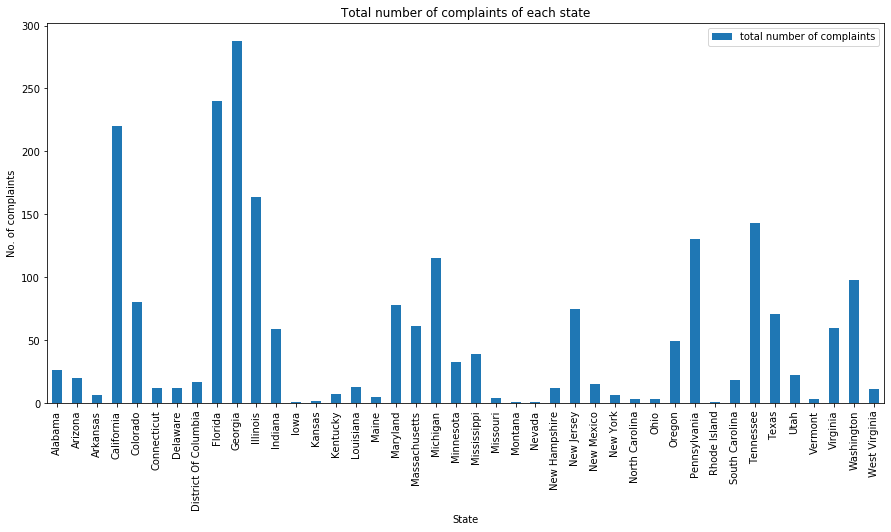

In [26]:
####### ploting total number of complaints of each state.

plt.figure(figsize=(15,7))
total_complaint.plot.bar(label = 'total number of complaints')
plt.ylabel('No. of complaints')
plt.title("Total number of complaints of each state")
plt.legend()

In [27]:
op = comcast[comcast['Categorized_Status']=='Open']
cl = comcast[comcast['Categorized_Status']=='Closed']

In [28]:
grouped_open = op['Categorized_Status'].groupby(by = op['State']).count()
grouped_closed = cl['Categorized_Status'].groupby(by = cl['State']).count()

In [29]:
states = comcast['State'].unique()

In [30]:
opens=[]
for i in states:
    try:
        opens.append(grouped_open[i])
    except:
        opens.append(0)

In [31]:
closes=[]
for i in states:
    try:
        closes.append(grouped_closed[i])
    except:
        closes.append(0)

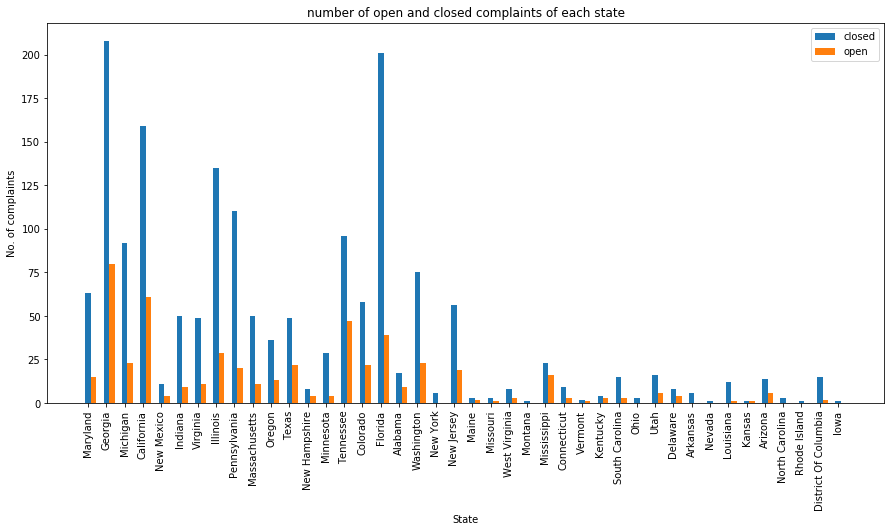

In [32]:
xpos = np.arange(len(states))
plt.figure(figsize=(15,7))
plt.xticks(xpos,states, rotation = 'vertical')
plt.bar(xpos,height= closes, width= 0.3, label = 'closed')
plt.bar(xpos+0.3,height= opens, width=0.3, label = 'open')
plt.ylabel('No. of complaints')
plt.xlabel('State')
plt.title('number of open and closed complaints of each state')
plt.legend()

In [33]:
open_per = []
for i in states:
    try:
        open_per.append(round((grouped_open[i]/total_complaint[i])*100,2))
    except:
        open_per.append(0)

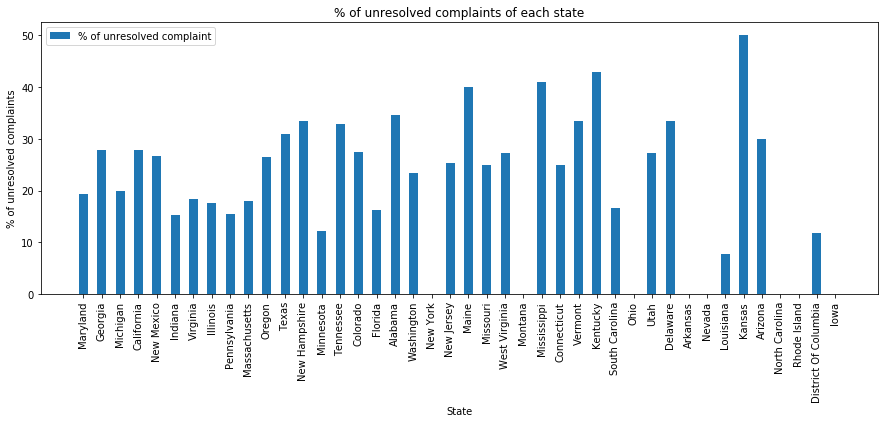

In [34]:
xpos = np.arange(len(states))
plt.figure(figsize=[15,5])
plt.xticks(xpos,states, rotation = 'vertical')
plt.bar(xpos,height= open_per, width= 0.5, label = '% of unresolved complaint')
plt.title('% of unresolved complaints of each state')
plt.ylabel('% of unresolved complaints')
plt.xlabel('State')
plt.legend()

In [35]:
rv = comcast['Received Via'].unique()

In [36]:
rv_open = op['Categorized_Status'].groupby(by = op['Received Via']).count()

In [37]:
rv_closed = cl['Categorized_Status'].groupby(by = cl['Received Via']).count()

In [38]:
rv_total = comcast['Categorized_Status'].groupby(by = comcast['Received Via']).count()

In [39]:
rv_percent = []
for i in rv:
    rv_percent.append(round((rv_closed[i]/rv_total[i])*100,2))

Text(0, 0.5, '% of resolved complaints')

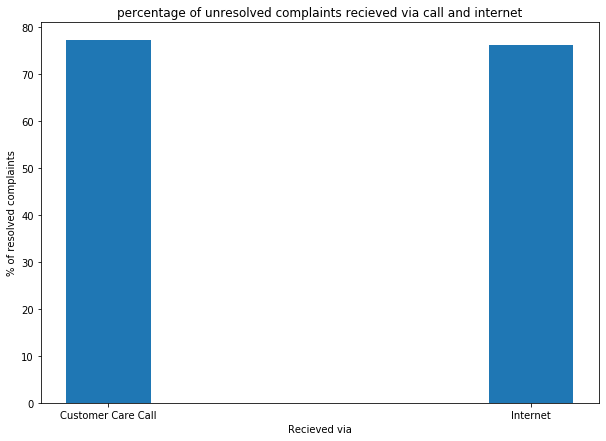

In [40]:
xpos = np.arange(len(rv))
plt.figure(figsize=(10,7))
plt.xticks(xpos,rv)
plt.bar(xpos,height= rv_percent, width= 0.2)
plt.title('percentage of unresolved complaints recieved via call and internet')
plt.xlabel('Recieved via')
plt.ylabel('% of resolved complaints')
